# <center>**PROYECTO 7**</center> 

## Paso 4. Análisis exploratorio de datos (Python)

Las instrucciones para el próximo análisis es el siguiente:
* importar los archivos
* estudiar los datos que contienen
* asegurar que los tipos de datos sean correctos
* identificar los 10 principales barrios en términos de finalización del recorrido
* hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
* sacar conclusiones basadas en cada gráfico y explicar los resultados

In [1]:
# Cargar todas las librerías que se necesitarán
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
from scipy.stats import levene

In [2]:
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_company.info()

# Verificación de únicos por si hubiera alguno repetido
print(df_company['company_name'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
64


Al parecer los datos contienen el tipo adecuado para trabajar con ellos y al haber 64 datos únicos, no hay repetidos o nulos.

In [3]:
df_dpoff = pd.read_csv('/datasets/project_sql_result_04.csv')
df_dpoff.info()

# Verificación de únicos por si hubiera alguno repetido
print(df_dpoff['dropoff_location_name'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
94


Al parecer los datos contienen el tipo adecuado para trabajar con ellos y al haber 64 datos únicos, no hay repetidos o nulos.

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:title={'center':'Average trips for dropoff locations for November 2017'}, xlabel='Dropoff Location', ylabel='Average Trips'>

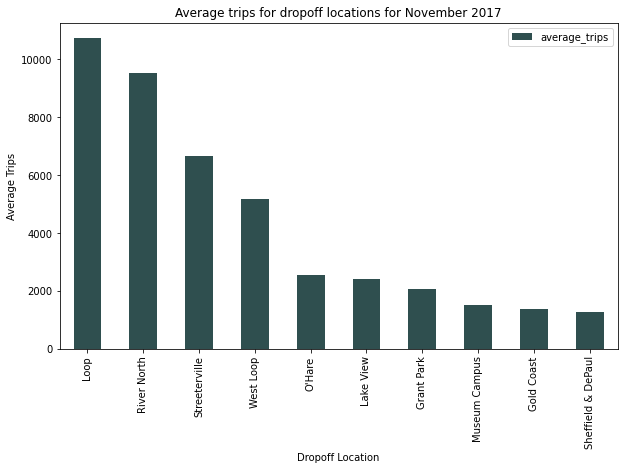

In [4]:
# grafico de principales barrios mas recorridos
df_final = df_dpoff.sort_values(
    by='average_trips', ascending=False).reset_index(drop=True)

# Asignación a nuevo dataframe los 10 barrios principales
df_final = df_final.head(10)
display(df_final)

# Gráfica de barras para ver los barrios principales
df_final.plot(kind='bar', x='dropoff_location_name', y='average_trips', xlabel='Dropoff Location',
              ylabel='Average Trips', figsize=(10, 6), color='darkslategray', title='Average trips for dropoff locations for November 2017')

Como podemos apreciar en el gráfico, a pesar de que se presentan los 10 destinos mas populares, hay cuatro que sobresalen del resto, que son: 'Loop', 'River North', 'Streeterville' y 'West Loop' con aproximadamente 10 mil, 9 mil, 6 mil y 5 mil, viajes promedio durante el mes de noviembre. Esto quiere decir que al ser las zonas mas concurridas, de seguro estas personas buscaran una tarifa mas accesible para sus viajes, lo que incrementaría la popularidad de algunas empresas de taxis como lo veremos en la siguiente tabla. 

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:title={'center':'Trips amount for main companies for november 15 & 16 of 2017'}, xlabel='Company', ylabel='Trips amount'>

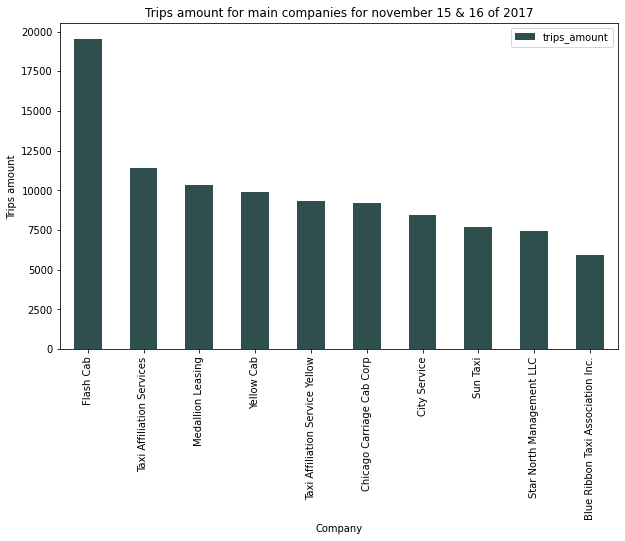

In [5]:
# grafico de principales barrios mas recorridos por compañía de Taxis
df_company_final = df_company.sort_values(
    by='trips_amount', ascending=False).reset_index(drop=True)

# Asignación a nuevo dataframe los 10 barrios principales
df_company_final = df_company_final.head(10)
display(df_company_final)

# Gráfica de barras para ver la relación entre compañía y cantidad de viajes para el 15 y 16 de noviembre
df_company_final.plot(kind='bar', x='company_name', y='trips_amount', xlabel='Company',
                      ylabel='Trips amount', figsize=(10, 6), color='darkslategray', title='Trips amount for main companies for november 15 & 16 of 2017')

En esta tabla podemos ver que de las 10 empresas mas populares en los días seeccionados se encuentra como número uno 'Flash Cab' llevando casi la mitad mas que cualquier otra empresa de taxi.
Como vimos en la tabla anterior de los destinos populares, la gente de seguro busca vehículos que cumplan con sus expectativas de: seguridad, comodidad, servicio y precio. Los datos no mienten y ya que las personas prefieren esta compañía, de seguro cuenta con lo mencionado!

### CONCLUSIÓN

La primer tabla se grafico el promedio del mes de noviembre para los principales destinos y en la segunda, las principales compañías.
Existe una relación que tal vez si se unieran las empresas con los destinos se pudiera comprobar pero con los datos que se tienen, se puede obtener un patrón en cuanto a tráfico.
Si observamos  los viajes realizados por la compañía en dos días, los totales son: 19,000, 11,000, 10,000, 9,000... hasta llegar a 5 mil aproximadamente y los viajes promedios a los diferentes destinos por dia es de 10,000, 9,000,  6,000, 5,000... hasta 1,200 aproximadamente.
Si hacemos la relacion de dos dias a uno, la mayoría coinciden con la cantidad de viajes realizados y su promedio.

## Paso 5. Prueba de hipótesis (Python)

Hipótesis nula (H<sub>0</sub>): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare permanece igual los sábados lluviosos.

Hipótesis alternativa (H<sub>1</sub>): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [6]:
# Información acerca del dataframe
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


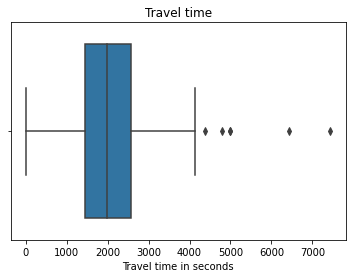

El tiempo mínimo en segundos es de: 0.0
El tiempo máximo en segundos es de: 7440.0


In [7]:
# Revisión de datos para revisar valores atípicos.
sns.boxplot(x=df_weather['duration_seconds'])
plt.xlabel('Travel time in seconds')
plt.title('Travel time')
plt.show()
print('El tiempo mínimo en segundos es de:',
      df_weather['duration_seconds'].min())
print('El tiempo máximo en segundos es de:',
      df_weather['duration_seconds'].max())

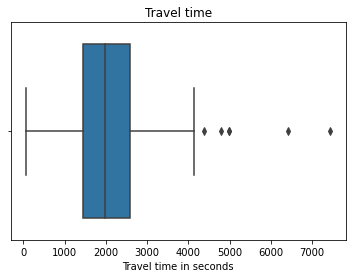

El tiempo mínimo en segundos es de: 60.0
El tiempo máximo en segundos es de: 7440.0


In [8]:
# Debido a que el viaje mínimo es de 0 segundos,siendo esto imposible, se eliminará este valor.
df_weather = df_weather[(df_weather['duration_seconds'] > 0)]

# Revisión de datos para revisar valores atípicos.
sns.boxplot(x=df_weather['duration_seconds'])
plt.xlabel('Travel time in seconds')
plt.title('Travel time')
plt.show()
print('El tiempo mínimo en segundos es de:',
      df_weather['duration_seconds'].min())
print('El tiempo máximo en segundos es de:',
      df_weather['duration_seconds'].max())

Ahora se cuenta con un DataFrame con datos mas coherentes sin tiempo = 0 seg.

El tipo de dato de tiempo es object, así que se cambiará a datetime

In [9]:
# Conversión de columna start_ts a formato date
df_weather['start_ts'] = pd.to_datetime(
    df_weather['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [10]:
# Separación de dataframe para datos cuyo 'weather condition' sea bad y sea en dia sabado
saturday_bad_weather = df_weather[(df_weather['start_ts'].dt.dayofweek == 5) & (
    df_weather['weather_conditions'] == 'Bad')].reset_index(drop=True)

In [11]:
# Separación de dataframe para datos cuyo 'weather condition' no sean 'bad'
else_weather = df_weather[(df_weather['weather_conditions'] != 'Bad')]

Antes de comprobar las hipótesis del ejercicio se verificará si hay igualdad o diferencias de varianzas. Así que estableceremos dos hipótesis para el test de levene:

Hipótesis nula (H<sub>0</sub>): La varianza entre los dos dataframes es similar.

Hipótesis alternativa (H<sub>1</sub>): La varianza entre los dos dataframes es diferente.

In [14]:
# Test de levene para comprobar si las varianzas son iguales o diferentes.

statistic, p_value = levene(
    saturday_bad_weather['duration_seconds'], else_weather['duration_seconds'])


print(f"Estadístico de Levene: {statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia de desigualdad de varianzas.")
else:
    print("La varianza entre los dos dataframes es similar.")

Estadístico de Levene: 0.18319196347283054
Valor p: 0.6687312920630069
La varianza entre los dos dataframes es similar.


Dado que la varianza se puede considerar similar, se puede seguir con la comprobación de hipótesis

In [13]:
# Para la prueba de hipótesis se establecerá un alfa de 0.05
alpha = 0.05

result = st.ttest_ind(
    saturday_bad_weather['duration_seconds'], else_weather['duration_seconds'])
print('valor p: ', result.pvalue)

if result.pvalue < alpha:
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare permanece igual los sábados lluviosos.")

valor p:  1.3318772977743245e-11
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


### CONCLUSIÓN
Como podemos ver el valor de p es demasiado pequeño, asi que se descarta la hipótesis nula que establece que la duración a los viajes es la misma con un buen clima y se demuestra que es diferente.